# COMP 6934 - Assignment 3

## Student Details

- **Name**: Pranav Arora
- **Mail**: parora@mun.ca
- **Course:** COMP 6934 Data Visualization

> Read PDF File to know more about the Assignment

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import squarify
import circlify

### Defining Colors

In [3]:
PURPLE = '#7c4ea6'
BLUE = '#5094c3'
YELLOW = '#f9c154'
WHITE = '#ffffff'

### Reading the data

In [4]:
df = pd.read_csv('bbb.csv')
df

,category,value
0,Smart home,101.2
1,Smart home,16.3
2,Smart home,134.0
3,Pet,17.9
4,Pet,17.9
...,...,...
157,Baby and kids,17.9
158,Baby and kids,16.1
159,Baby and kids,88.1
160,Baby and kids,15.6


> Getting to know all the categories

In [5]:
df['category'].unique()

array(['Smart home', 'Pet', 'Personalized gifts', 'Outdoor', 'More',
       'Kitchen', 'Home decor', 'Holiday', 'Health and beauty',
       'Furniture', 'Dining', 'Curtains and windows', 'College',
       'Cleaning and storage', 'Bed', 'Bath', 'Baby and kids'],
      dtype=object)

### Adding the color column associated with each category (Bed, Bath and other products)

In [6]:
df['color'] = PURPLE
df.loc[df['category']=='Bed','color'] = YELLOW
df.loc[df['category']=='Bath','color'] = BLUE

### Grouping and Sorting

> - Simply added a color column to my grouped dataframe
> - Then sorted the dataframe (df2)

In [7]:
df2 = df.groupby(by='category').sum().reset_index()
df2 = df2.sort_values(by='value', ascending=False).reset_index(drop=True)
df2['color'] = PURPLE
df2.loc[3, 'color'] = BLUE
df2.loc[10, 'color'] = YELLOW
df2

,category,value,color
0,Kitchen,1063.7,#7c4ea6
1,Home decor,979.5,#7c4ea6
2,Furniture,940.6,#7c4ea6
3,Bath,813.7,#5094c3
4,Health and beauty,808.4,#7c4ea6
5,Outdoor,781.4,#7c4ea6
6,Dining,730.4,#7c4ea6
7,Baby and kids,696.0,#7c4ea6
8,College,695.9,#7c4ea6
9,Cleaning and storage,682.8,#7c4ea6


## Answer 1

> - Simply used `squarify.plot()` to plot the TreeMap

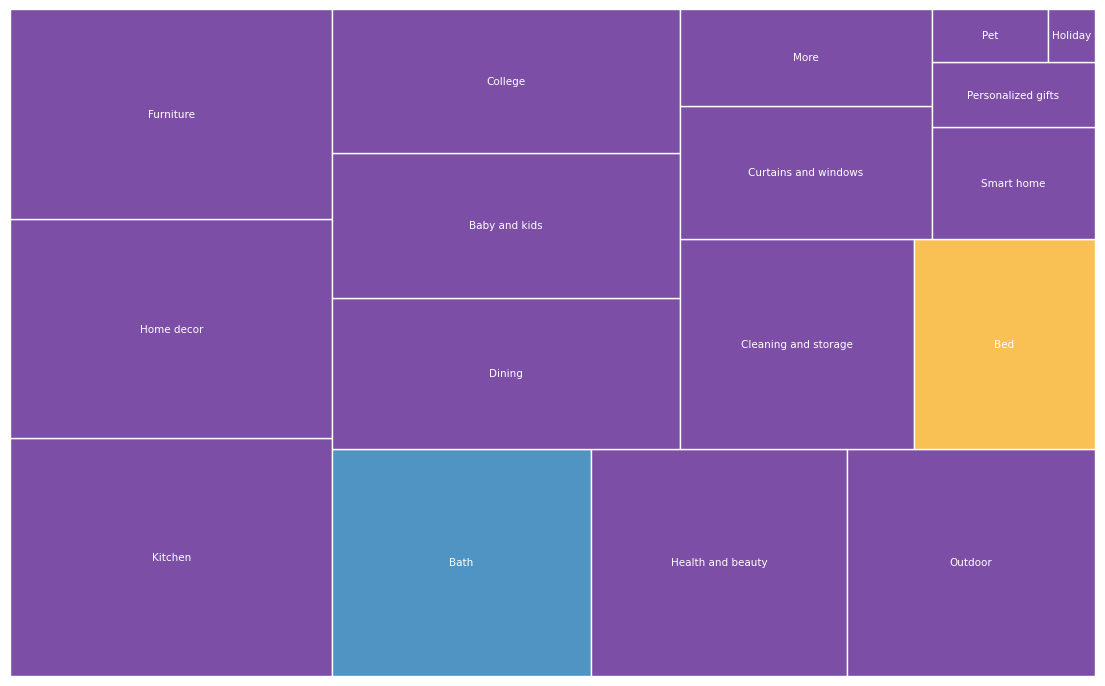

In [8]:
width = 1400
height = 866

# Getting the figure size in pixels for consistency
px = 1/plt.rcParams['figure.dpi']  
fig, ax = plt.subplots(figsize=(width*px,height*px))

df2_value = df2['value']
df2_category = df2['category']

squarify.plot(df2_value, label=df2_category, color=df2['color'],ax=ax, edgecolor=WHITE, text_kwargs=dict(fontsize=7.5, color=WHITE))
  
plt.axis("off") 

plt.show()

## Answer 2

### Making my data frame ready (`sorted_df`)

> I did three things here:
>  - Sorted the dataframe in descending order
>  - Sorted the categories in descending order based on their values
>  - Used those sorted categories to align the data sorted by categories and in each category its sorted in reverse order from its largest value

In [9]:
df = df.sort_values(by='value', ascending=False).reset_index(drop=True)
category_sums = df.groupby('category')['value'].sum()
sorted_categories = category_sums.sort_values(ascending=False).index
sorted_df = df.set_index('category').loc[sorted_categories].reset_index()

sorted_df

,category,value,color
0,Kitchen,168.4,#7c4ea6
1,Kitchen,152.7,#7c4ea6
2,Kitchen,123.2,#7c4ea6
3,Kitchen,100.7,#7c4ea6
4,Kitchen,88.1,#7c4ea6
...,...,...,...
157,Pet,17.9,#7c4ea6
158,Pet,17.9,#7c4ea6
159,Pet,15.6,#7c4ea6
160,Pet,15.6,#7c4ea6


> Created a wrap text function to stop overflowing the text

In [10]:
def wrap_string(input_string, max_line_length):
    '''Function to wrap the given string upto its maximum line length'''
    words = input_string.split()
    lines = []
    current_line = ''
    for word in words:
        if len(word) > max_line_length:
            for i in range(0, len(word), max_line_length):
                lines.append(word[i:i+max_line_length] + '-')
            continue
        if len(current_line) + len(word) > max_line_length:
            lines.append(current_line.rstrip('-'))
            current_line = ''
        current_line += word + ' '
        if len(current_line) > max_line_length:
            lines.append(current_line[:max_line_length - 1] + '-')
            current_line = current_line[max_line_length - 1:]
    if current_line:
        lines.append(current_line.rstrip('-'))
    return '\n'.join(lines)


### Hierarchical Tree Map

> - I converted the figsize from inches to pixels so that I can imagine/calculate it easily
> - Then I Normalized the value sizes according to the frame of my figure (`squarify.normalize()`)
> - Then I made rectangles of those normalized sizes (`squarify.squarify()`)
> - Then looping over each category(df2), I got normalized sizes and then their respective rectangles
> - Then I plotted the those rectangles
> - Finally I overlapped the category rectangle with its white edge and reducing opacity(alpha)

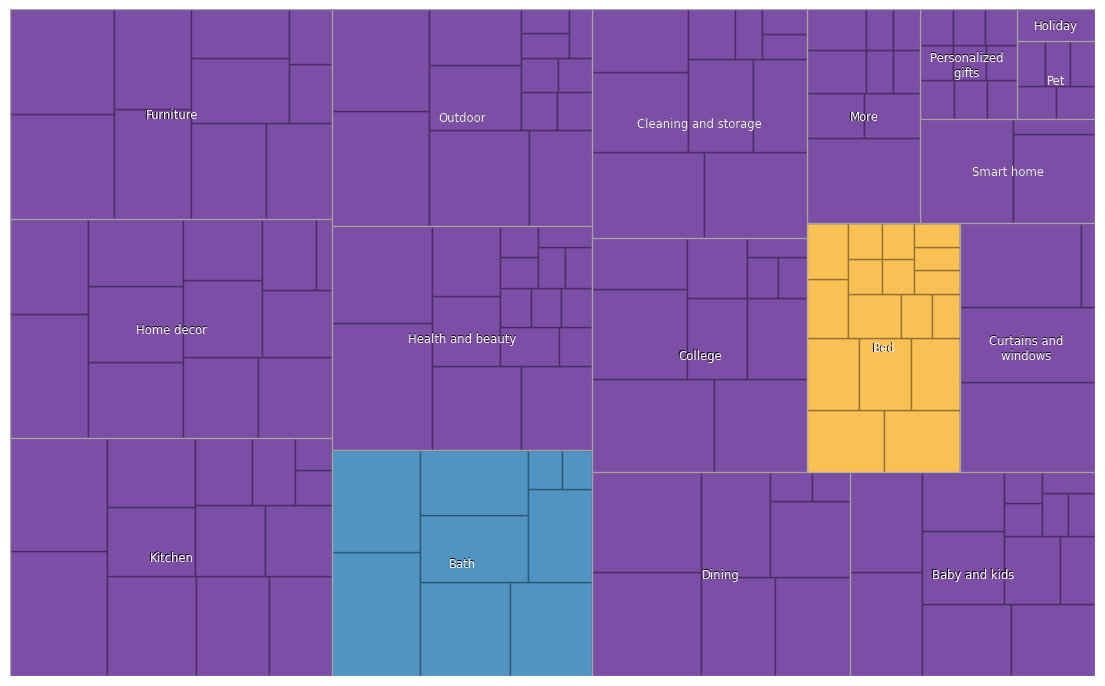

In [11]:
x = 0
y = 0
width = 1400
height = 866
px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(width*px,height*px))

ax.set_xlim(x, width)
ax.set_ylim(y, height)

category_normalized = squarify.normalize_sizes(df2['value'], width, height)

category_rectangles = squarify.squarify(category_normalized, x, y, width, height)

for index, row in df2.iterrows():
    category_df = sorted_df[sorted_df['category']==df2.iloc[index,0]]
    category_normalized = squarify.normalize_sizes(category_df['value'], category_rectangles[index].get('dx'), category_rectangles[index].get('dy'))
    category_squarify = squarify.squarify(category_normalized, category_rectangles[index].get('x'), category_rectangles[index].get('y'), category_rectangles[index].get('dx'), category_rectangles[index].get('dy'))
    for r in category_squarify:
        ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df2.iloc[index,2]))
    ax.add_patch(patches.Rectangle((category_rectangles[index]['x'], category_rectangles[index]['y']), category_rectangles[index]['dx'], category_rectangles[index]['dy'],alpha=0.6, ec='white',label=df2.iloc[index,0], facecolor=df2.iloc[index,2]))
    x_text = category_rectangles[index]['x'] + category_rectangles[index]['dx'] / 2
    y_text = category_rectangles[index]['y'] + category_rectangles[index]['dy'] / 2
    if df2.iloc[index,0] == 'Personalized gifts' or df2.iloc[index,0] == 'Curtains and windows':
        txt = wrap_string(df2.iloc[index,0], 13)
    else:
        txt = df2.iloc[index,0]
    ax.text(x_text, y_text,txt, ha='center', va='center', fontsize='small', color='black')
    ax.text(x_text+0.5, y_text-0.5, txt, ha='center', va='center', fontsize='small', color='white')


plt.axis("off")
    
plt.show()

## Answer 3

> - I created a new dataframe (`df_bbb`)
> - It has three categories: Bath, Bed, Beyond

In [12]:
df_bbb = df2.groupby('color', as_index=False).sum()
df_bbb = df_bbb[['category', 'value', 'color']]
df_bbb.loc[1, 'category'] = 'Beyond'
df_bbb = df_bbb.sort_values(by='category').reset_index(drop=True)
df_bbb

,category,value,color
0,Bath,813.7,#5094c3
1,Bed,528.5,#f9c154
2,Beyond,8699.8,#7c4ea6


### Organized Hierarchical Tree Map

> - First I created `df_bbb` Dataframe which has only 3 categories
> - Then under each category I looped its corresponding products
> - Then applied the same procedure as in Answer 2
> - Adjusted texts by some height, width calculations and using ax.text() `ha`, `va` properties

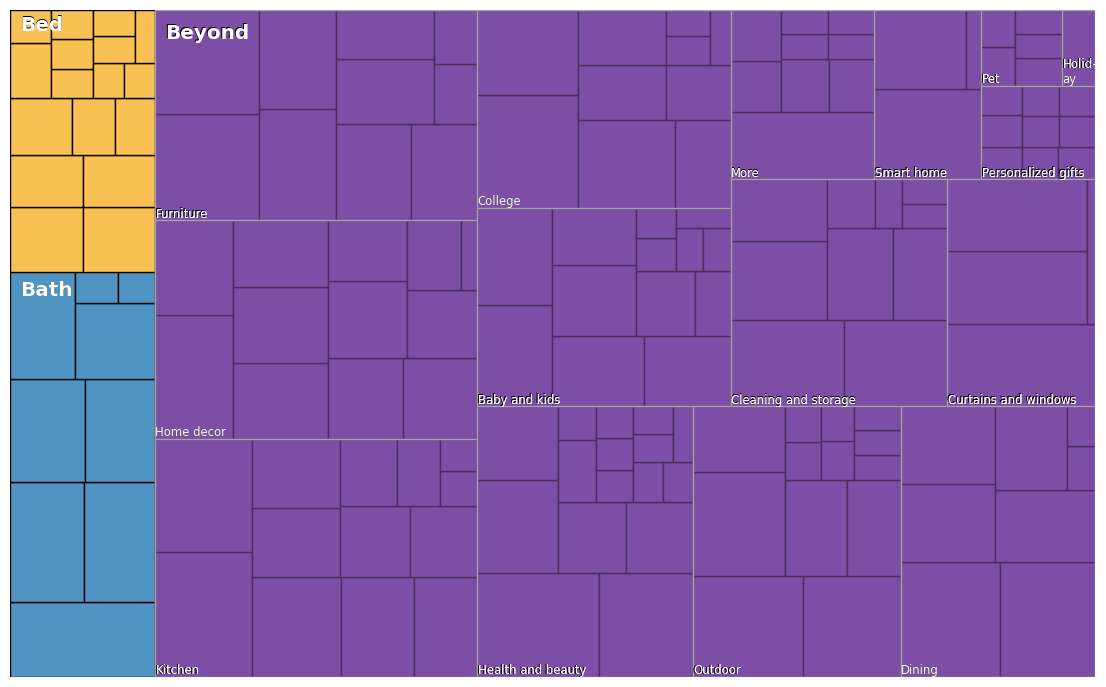

In [13]:
x = 0
y = 0
width = 1400
height = 866
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(width*px,height*px))

ax.set_xlim(x, width)
ax.set_ylim(y, height)

category_normalized = squarify.normalize_sizes(df_bbb['value'], width, height)

category_rectangles = squarify.squarify(category_normalized, x, y, width, height)


for index, row in df_bbb.iterrows():

    ax.add_patch(patches.Rectangle((category_rectangles[index]['x'], category_rectangles[index]['y']), category_rectangles[index]['dx'], category_rectangles[index]['dy'],alpha=0.6, ec='white', facecolor=df_bbb.iloc[index,2]))
    x_text = category_rectangles[index]['x'] + category_rectangles[index]['dx'] / 15
    y_text = category_rectangles[index]['y'] + category_rectangles[index]['dy'] - 0.02 * category_rectangles[index]['dy']

    if(df_bbb.iloc[index,0] == 'Beyond'):
        x_text = category_rectangles[index]['x'] + category_rectangles[index]['dx'] / 100

    ax.text(x_text, y_text,df_bbb.iloc[index,0], ha='left', va='top', fontsize='x-large', color='black', fontweight='bold')
    ax.text(x_text+1, y_text-1, df_bbb.iloc[index,0], ha='left', va='top', fontsize='x-large', color='white', fontweight='bold')

    if(row.iloc[0] == 'Bath'):
        df_bath = sorted_df[sorted_df['category']=='Bath']
        x = category_rectangles[0].get('x')
        y = category_rectangles[0].get('y')
        dx = category_rectangles[0].get('dx')
        dy = category_rectangles[0].get('dy')

        bath_normalized = squarify.normalize_sizes(df_bath['value'], dx, dy)
        bath_squarify = squarify.squarify(bath_normalized, x, y, dx, dy)
        for r in bath_squarify:
            ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df_bbb.iloc[index,2]))
    
    if(row.iloc[0] == 'Bed'):
        df_bed = sorted_df[sorted_df['category']=='Bed']
        x = category_rectangles[1].get('x')
        y = category_rectangles[1].get('y')
        dx = category_rectangles[1].get('dx')
        dy = category_rectangles[1].get('dy')

        bed_normalized = squarify.normalize_sizes(df_bed['value'], dx, dy)
        bed_squarify = squarify.squarify(bed_normalized, x, y, dx, dy)
        for r in bed_squarify:
            ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df_bbb.iloc[index,2]))

    else:
        df_beyond = sorted_df[~((sorted_df['category'] == 'Bath') | (sorted_df['category'] == 'Bed'))]
        df_beyond = df_beyond.reset_index(drop=True)
        x = category_rectangles[2].get('x')
        y = category_rectangles[2].get('y')
        dx = category_rectangles[2].get('dx')
        dy = category_rectangles[2].get('dy')

        
        df2_filtered = df2[~((df2['category'] == 'Bath') | (df2['category'] == 'Bed'))]
        df2_filtered = df2_filtered.sort_values(by='value', ascending=False).reset_index(drop=True)

        beyond_normalized = squarify.normalize_sizes(df2_filtered['value'], dx, dy)
        beyond_squarify = squarify.squarify(beyond_normalized, x, y, dx, dy)


        for index, row in df2_filtered.iterrows():
            category_df = df_beyond[df_beyond['category']==df2_filtered.iloc[index,0]]
            category_normalized = squarify.normalize_sizes(category_df['value'], beyond_squarify[index].get('dx'), beyond_squarify[index].get('dy'))
            category_squarify = squarify.squarify(category_normalized, beyond_squarify[index].get('x'), beyond_squarify[index].get('y'), beyond_squarify[index].get('dx'), beyond_squarify[index].get('dy'))
            for r in category_squarify:
                ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df2_filtered.iloc[index,2]))
            ax.add_patch(patches.Rectangle((beyond_squarify[index]['x'], beyond_squarify[index]['y']), beyond_squarify[index]['dx'], beyond_squarify[index]['dy'],alpha=0.6, ec='white',label=df2_filtered.iloc[index,0], facecolor=df2_filtered.iloc[index,2]))
            x_text = beyond_squarify[index]['x']
            y_text = beyond_squarify[index]['y']
            
            # Text Wrap
            if df2_filtered.iloc[index,0] == 'Holiday':
                txt = wrap_string(df2_filtered.iloc[index,0], 5)[:-1]
            else:
                txt = df2_filtered.iloc[index,0]
            ax.text(x_text, y_text,txt, ha='left', va='bottom', fontsize='small', color='black')
            ax.text(x_text+0.5, y_text-0.5,txt, ha='left', va='bottom', fontsize='small', color='white')

plt.axis("off")
    
plt.show()

## Answer 4

> - For circlify, first I had to convert my data frame into a dictionary (`data_dict`) in specified in circlify documentation
> - `dict_data`
>   - (Level 1) id --> category name
>   - (Level 1) datum --> category sum value
>   - (Level 2) children --> {id --> individual category name, datum --> value of that category}
> - Then I created circles using `dict_data`
> - Then I created the Level 1 circles, that contained grouped category names and their sum value
> - Then I created the Level 2 circles, that contained individual category values

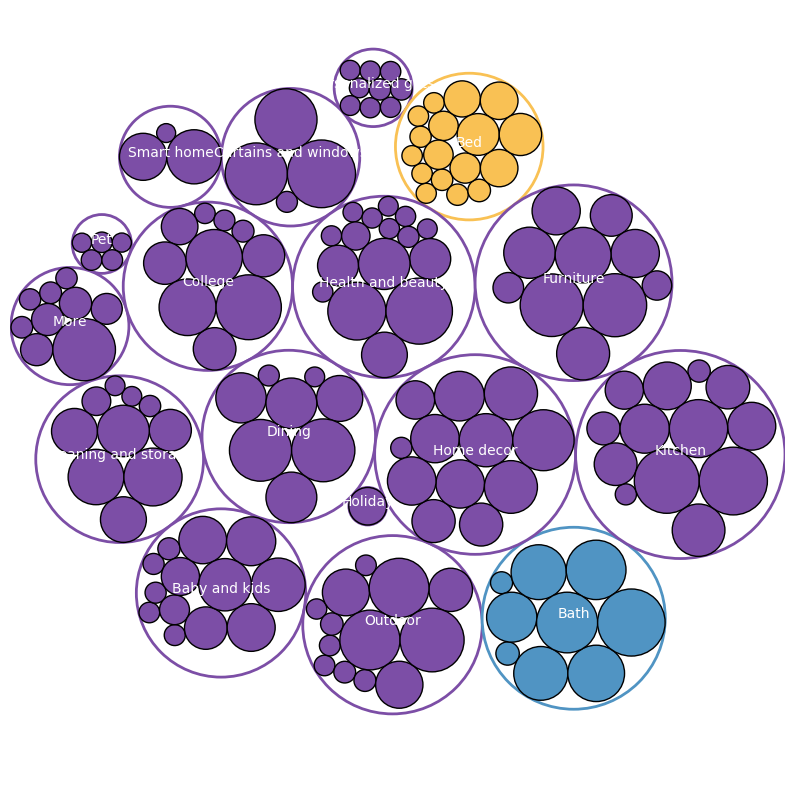

In [14]:
data_dict = []
for index, row in df2.iterrows():
    child_array = []
    cat_dict = dict(id=df2.iloc[index,0], datum=df2.iloc[index,1], children=child_array)

    individual_cat_values = dict()
    for index2, row in df.iterrows():
        if df.iloc[index2, 0] == df2.iloc[index,0]:
            individual_cat_values.update(id = df.iloc[index2, 0], datum = df.iloc[index2, 1])
            child_array.append(individual_cat_values.copy())
    cat_dict['children'] = child_array
    data_dict.append(cat_dict)

circle_df = pd.DataFrame(data_dict).sort_values(by='datum', ascending=False)
circle_df['color'] = PURPLE
circle_df.loc[3, 'color'] = BLUE
circle_df.loc[10, 'color'] = YELLOW

circles = circlify.circlify(
    data_dict, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


fig, ax = plt.subplots(figsize=(10,10))


ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for index, circle in enumerate(circles):
    if circle.level == 1:    
        x, y, r = circle
        label = circle.ex["id"]
        edgecolor = BLUE if label == 'Bath' else ( YELLOW if label == 'Bed' else PURPLE)
        ax.add_patch( plt.Circle((x, y), r, linewidth=2, color="white", ec=edgecolor))
        plt.annotate(label, (x,y ), ha='center', color="white")

for index, circle in enumerate(circles):
    if circle.level == 2:
        x, y, r = circle
        label = circle.ex["id"]
        facecolor = BLUE if label == 'Bath' else ( YELLOW if label == 'Bed' else PURPLE)
        ax.add_patch( plt.Circle((x, y), r, linewidth=1, ec='black', color=facecolor))

plt.show()

## Answer 5

> - Similar logic as in Answer 4
> - Tried to adjust circles and labels in a required way as much as I could

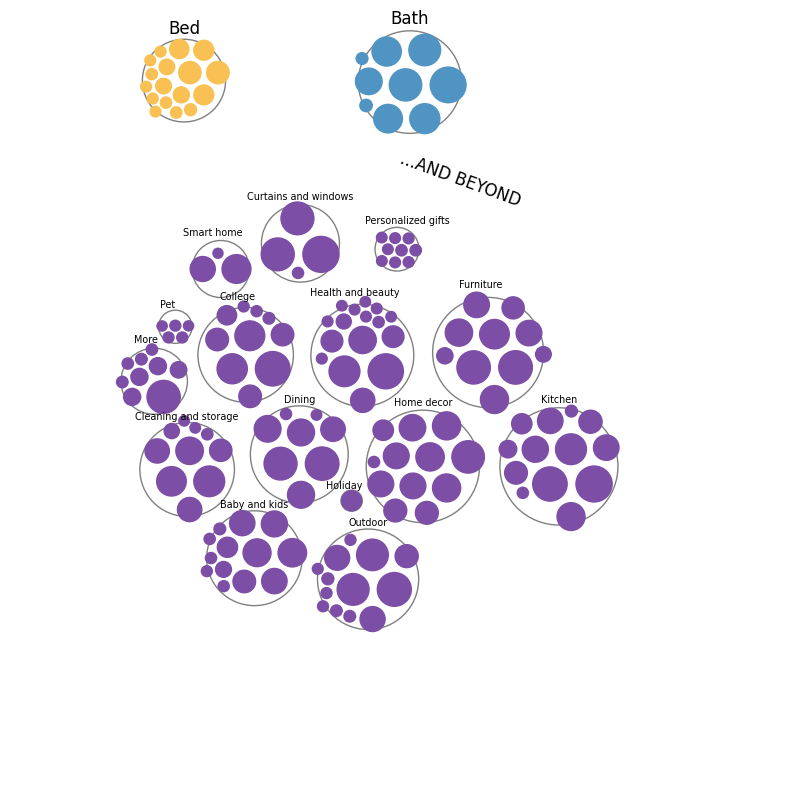

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r + .5,
        abs(circle.y) + circle.r + .5,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for index, circle in enumerate(circles):
    if circle.level == 1:  
        x, y, r = circle
        label = circle.ex["id"]
        if label == 'Bath':
            ax.add_patch( plt.Circle((x-.4, y+1.8), r*0.85, color="white", ec='grey'))
            ax.annotate(label, (x-.4,y+2.025 ), ha='center', color="black", fontsize='large')
        elif label == 'Bed':
            ax.add_patch( plt.Circle((x-1, y+.6), r*0.85, color="white", ec='grey'))
            ax.annotate(label, (x-1,y+.78 ), ha='center', color="black", fontsize='large')
        elif label == 'Personalized gifts':
            ax.add_patch( plt.Circle((x+0.06, y-.2), r*0.85, color="white", ec='grey'))
            ax.annotate(label, (x+0.1,y-0.1 ), ha='center', color="black", fontsize='x-small')
        elif label == 'Curtains and windows':
            ax.add_patch( plt.Circle((x-.1, y), r*0.85, color="white", ec='grey'))
            ax.annotate(label, (x-0.1,y+0.17 ), ha='center', color="black", fontsize='x-small')
        else:
            ax.add_patch( plt.Circle((x-.1, y-.1), r*0.85, color="white", ec='grey'))
            if label == 'Pet' or label == 'Holiday' or label == 'Smart home' or label=='Health and beauty' or label=='More' or label=='Furniture' or label=='College':
                ax.annotate(label, (x-.13,y-.1+r+0.03 ), ha='center', va='top', color="black", fontsize='x-small')
            else:
                ax.annotate(label, (x-.1,y-.1+r+0.01 ), ha='center', va='top', color="black", fontsize='x-small')

for index, circle in enumerate(circles):
    if circle.level == 2:
        x, y, r = circle
        label = circle.ex["id"]
        facecolor = BLUE if label == 'Bath' else ( YELLOW if label == 'Bed' else PURPLE)
        if label == 'Bath':
            ax.add_patch( plt.Circle((x-.4, y+1.8), r*0.8, color=facecolor))
        elif label == 'Bed':
            ax.add_patch( plt.Circle((x-1, y+.6), r*0.8, color=facecolor))
        elif label == 'Personalized gifts':
            ax.add_patch( plt.Circle((x+0.06, y-.2), r*0.8, color=facecolor))
        elif label == 'Curtains and windows':
            ax.add_patch( plt.Circle((x-0.1, y), r*0.8, color=facecolor))
        else:
            ax.add_patch( plt.Circle((x-.1, y-.1), r*0.8, color=facecolor))

ax.text(0,.75,'...AND BEYOND', fontsize='large', rotation=-20)

plt.show()

## Attributions

- Took some advise from the Professor for hierarichal rectangles.
- Getting appropriate figure size - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
- How to change figure size to pixels - https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/
- How to plot a rectangle - https://www.statology.org/matplotlib-rectangle/
- Matplotlib Patches Rectangle - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
- Matplotlib add patch - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html
- Text rotation - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
- Text wrapping - https://stackoverflow.com/questions/4018860/text-box-with-line-wrapping
- Squarify Documentation - https://github.com/laserson/squarify/tree/master
- Squarify Code - https://github.com/laserson/squarify/blob/master/squarify/\_\_init\_\_.py
- Xlim and Ylim - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
- Circlify Documentation - https://github.com/elmotec/circlify/tree/main
- Plotting Circles - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html
- How to create hierarichal columns - https://stackoverflow.com/questions/17985159/creating-dataframe-with-hierarchical-columns
- Changing color in 1 circle in circlify - https://stackoverflow.com/questions/70316445/circlify-change-the-colour-of-just-one-of-the-circles#:~:text=To%20assign%20different%20colors%20to,sorted%20from%20smallest%20to%20largest.
- Circlify hierarchy - https://python-graph-gallery.com/circular-packing-several-levels-of-hierarchy/
- Circle Level 1 hierarchy - https://python-graph-gallery.com/circular-packing-1-level-hierarchy/